In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.6.0
60000


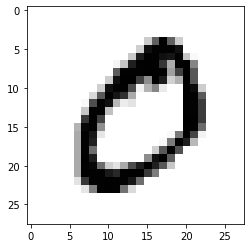

In [2]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [3]:
print(y_train[1])

0


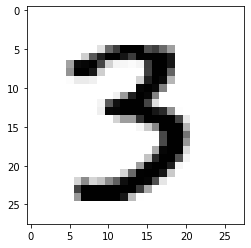

10001 번째 이미지의 숫자는 바로  3 입니다.


In [4]:
index=10000     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [5]:
print(x_train.shape)

(60000, 28, 28)


In [6]:
print(x_test.shape)

(10000, 28, 28)


In [7]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [8]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


In [9]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [11]:
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [12]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.1760 - accuracy: 0.9475
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0565 - accuracy: 0.9830
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0399 - accuracy: 0.9870
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0319 - accuracy: 0.9902
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0246 - accuracy: 0.9924
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0208 - accuracy: 0.9933
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0179 - accuracy: 0.9943
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0137 - accuracy: 0.9956
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0120 - accuracy: 0.9962
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.01

In [13]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

313/313 - 1s - loss: 0.0340 - accuracy: 0.9899
test_loss: 0.03398951143026352
test_accuracy: 0.9898999929428101


In [14]:
predicted_result = model.predict(x_test_reshaped) 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [8.7963556e-13 6.1673097e-11 9.2939683e-07 1.6453099e-09 5.7952643e-11
 2.7953531e-12 3.9415719e-18 9.9999905e-01 4.6620935e-10 2.1173718e-09]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


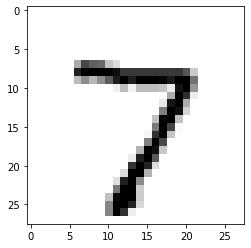

In [15]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [3.3387969e-05 3.7800037e-06 3.0662422e-03 1.2466604e-04 3.0919578e-05
 9.4081906e-06 1.0648007e-10 9.9168527e-01 2.3539425e-07 5.0461954e-03]
라벨: 9, 예측결과: 7


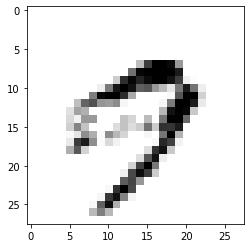

예측확률분포: [1.0512844e-05 1.6650154e-03 1.2397097e-02 3.8425125e-07 8.2805461e-01
 3.6231433e-09 1.5787061e-01 1.5613940e-06 1.5758907e-07 1.6964464e-09]
라벨: 2, 예측결과: 4


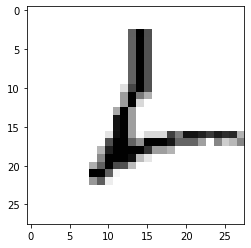

예측확률분포: [1.02037155e-11 5.93139671e-09 5.44568036e-11 7.64515936e-01
 8.55799654e-15 2.35480174e-01 3.69742406e-06 1.90357818e-09
 1.97244361e-07 2.82118009e-08]
라벨: 5, 예측결과: 3


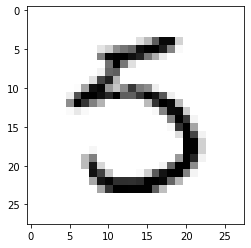

예측확률분포: [7.3421546e-03 1.7715494e-04 3.6282265e-03 6.8422556e-02 1.7476271e-04
 3.1707052e-05 2.9619343e-07 7.5225401e-01 1.0055870e-04 1.6786858e-01]
라벨: 9, 예측결과: 7


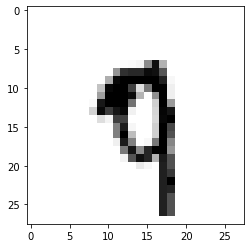

예측확률분포: [8.7276192e-08 2.1658330e-01 2.0533048e-04 1.4297187e-01 1.0593748e-05
 1.7774120e-04 7.5302921e-07 4.8759505e-02 5.9126645e-01 2.4354316e-05]
라벨: 1, 예측결과: 8


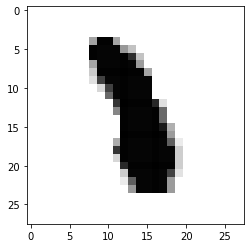

In [16]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [17]:
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               